Design a MCP Neuron for ”AND” Boolean Functions and ”OR” Boolean Functions with two inputs:


In [14]:
class Rperceptron(object):
    import numpy as np

    def __init__(self, rate=0.01, nepochs=10):

        self.rate = rate
        self.nepochs = nepochs

    def learn(self, X, y):

        self.weights = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.nepochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def agg_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.agg_input(X) >= 0.0, 1, -1)

In [15]:
import numpy as np

def test_Rperceptron () :
 # Test parameters
    learning_rate = 0.01
    epochs = 10
    # Test input data and labels
    X_train = np.array ([[0 , 0] , [0 , 1] , [1 , 0] , [1 , 1]])
    y_train = np.array ([ -1 , -1 , -1 , 1])
 # Instantiate the perceptron
    perceptron = Rperceptron( learning_rate , epochs )
 # Train the perceptron
    perceptron.learn ( X_train , y_train )
 # Test predictions
    X_test = np.array ([[0 , 0] , [0 , 1] , [1 , 0] , [1 , 1]])
    expected_predictions = np.array ([ -1 , -1 , -1 , 1])
    predictions = perceptron.predict ( X_test )

 # Check if predictions match expectations
    assert np.array_equal ( predictions , expected_predictions ) , " Predictions do not match expected values ."

    print (" Test passed successfully !")

test_Rperceptron ()

 Test passed successfully !


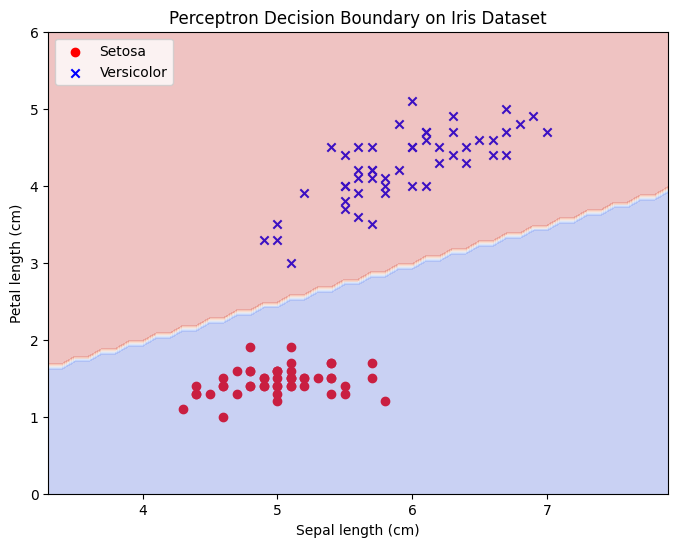

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load the iris dataset
iris = load_iris()
X = iris.data[:, [0, 2]]  # Using only sepal length and petal length for visualization
y = iris.target
# Step 2: Preprocess the data
X = X[y != 2]  # Remove samples corresponding to the "iris virginica" class
y = y[y != 2]
# Step 3: Train the perceptron model
perceptron = Rperceptron(rate=0.1, nepochs=100)
perceptron.learn(X, y)

# Step 4: Visualize the decision boundary and the data points
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='Versicolor')

# Plot decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = perceptron.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='coolwarm')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend(loc='upper left')
plt.title('Perceptron Decision Boundary on Iris Dataset')
plt.show()


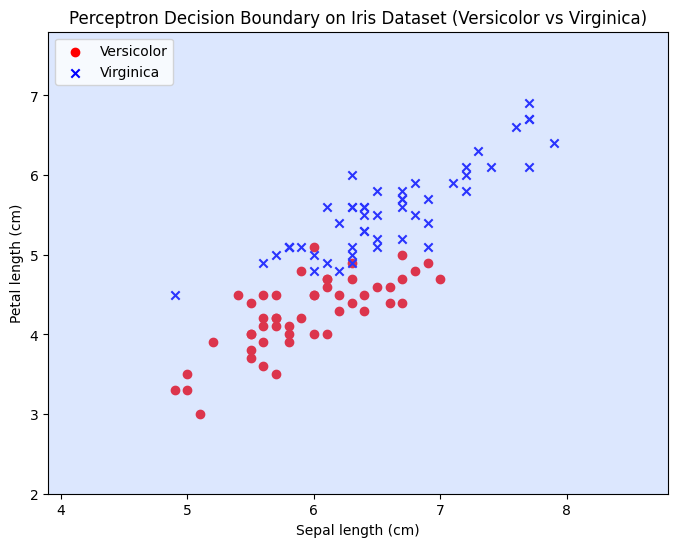

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Step 1: Load the iris dataset
iris = load_iris()
X = iris.data[50:150, [0, 2]]  # Using only sepal length and petal length for visualization
y = iris.target[50:150]  # Using only the versicolor and virginica classes

# Step 2: Train the perceptron model
perceptron = Rperceptron(rate=0.1, nepochs=100)
perceptron.learn(X, y)

# Step 3: Visualize the decision boundary and the data points
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', marker='o', label='Versicolor')
plt.scatter(X[y == 2, 0], X[y == 2, 1], color='blue', marker='x', label='Virginica')

# Plot decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = perceptron.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='coolwarm')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend(loc='upper left')
plt.title('Perceptron Decision Boundary on Iris Dataset (Versicolor vs Virginica)')
plt.show()
